In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
retail = pd.read_csv('/content/retail_sales.csv')
retail

,Customer ID,Gender,Age,Salary,Product ID,Price,Purchased
0,1,Female,49,61000,P01,2000,1
1,2,Male,36,30000,P02,2000,1
2,3,Female,26,81000,P02,3500,1
3,4,Female,32,74000,P01,7000,0
4,5,Female,42,56000,P01,5000,0
...,...,...,...,...,...,...,...
995,996,Male,21,73000,P02,5000,1
996,997,Male,62,54000,P01,5000,0
997,998,Female,41,20000,P03,2000,0
998,999,Male,22,29000,P03,5000,0


# **Data Cleaning**

In [3]:
# checking the columns in the dataframe
retail.columns

Index(['Customer ID', 'Gender', 'Age', 'Salary', 'Product ID', 'Price',
       'Purchased'],
      dtype='object')

In [4]:
# more information on dataframe
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  1000 non-null   int64 
 1   Gender       1000 non-null   object
 2   Age          1000 non-null   int64 
 3   Salary       1000 non-null   int64 
 4   Product ID   1000 non-null   object
 5   Price        1000 non-null   int64 
 6   Purchased    1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [5]:
# checking the datatypes of each columns in the dataframe
retail.dtypes

Customer ID     int64
Gender         object
Age             int64
Salary          int64
Product ID     object
Price           int64
Purchased       int64
dtype: object

In [6]:
# checking the dimension of the dataframe
retail.shape

(1000, 7)

In [7]:
# statitics of the dataframe
retail.describe()

,Customer ID,Age,Salary,Price,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.989000,58667.000000,4435.500000,0.414000
std,288.819436,13.738837,23615.372044,1847.973148,0.492795
min,1.000000,18.000000,20000.000000,2000.000000,0.000000
25%,250.750000,29.000000,38000.000000,3500.000000,0.000000
50%,500.500000,40.000000,59000.000000,5000.000000,0.000000
75%,750.250000,53.000000,80000.000000,7000.000000,1.000000
max,1000.000000,64.000000,100000.000000,7000.000000,1.000000


In [8]:
# checking fpr duplicated values in the dataframe
retail.duplicated().sum()

0

In [9]:
#checking for null values
retail.isnull().sum()

Customer ID    0
Gender         0
Age            0
Salary         0
Product ID     0
Price          0
Purchased      0
dtype: int64

In [10]:
#checking for Nans
retail.isna().sum()

Customer ID    0
Gender         0
Age            0
Salary         0
Product ID     0
Price          0
Purchased      0
dtype: int64

In [11]:
# value count of gender column
retail['Gender'].value_counts()

Female    523
Male      477
Name: Gender, dtype: int64

In [12]:
# using label encoder to convert categorical columns to dummy variable
le_gender = LabelEncoder()

In [13]:
#using fit_transform
retail["Gender"] = le_gender.fit_transform(retail["Gender"])

In [14]:
#Inspecting the dataframe
retail.head()

,Customer ID,Gender,Age,Salary,Product ID,Price,Purchased
0,1,0,49,61000,P01,2000,1
1,2,1,36,30000,P02,2000,1
2,3,0,26,81000,P02,3500,1
3,4,0,32,74000,P01,7000,0
4,5,0,42,56000,P01,5000,0


<ipython-input-15-abb2ebec3ea8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(retail.corr(), annot = True, cmap = "viridis")


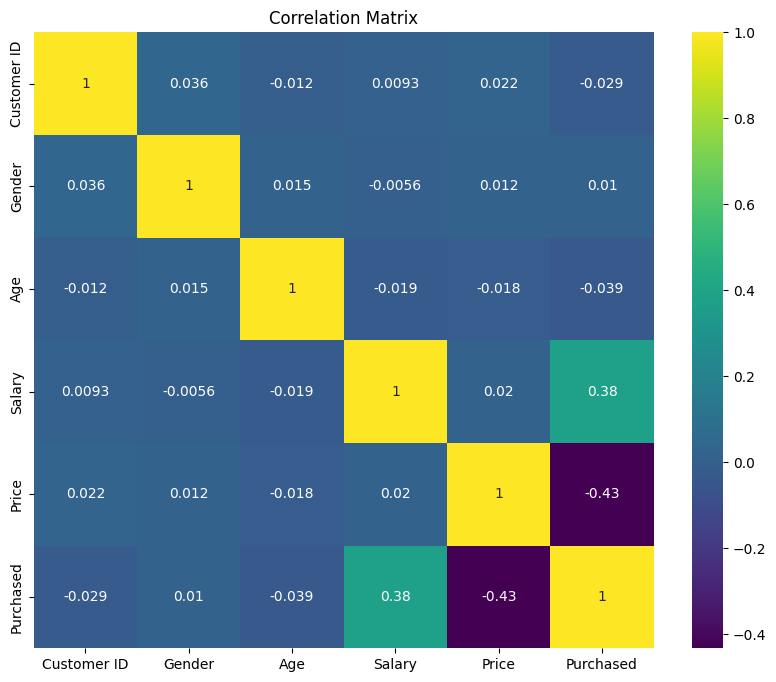

In [15]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(retail.corr(), annot = True, cmap = "viridis")
plt.title('Correlation Matrix')
plt.show()

# **Selecting Relevant Feature for Training the Model**

In [16]:
#splitting dependent from independent columns and converting independent columns to a numpy array, excluding the customer and product ID column
x = retail[["Gender", "Age", "Salary", "Price"]]
x

,Gender,Age,Salary,Price
0,0,49,61000,2000
1,1,36,30000,2000
2,0,26,81000,3500
3,0,32,74000,7000
4,0,42,56000,5000
...,...,...,...,...
995,1,21,73000,5000
996,1,62,54000,5000
997,0,41,20000,2000
998,1,22,29000,5000


In [17]:
y = retail["Purchased"]
y

0      1
1      1
2      1
3      0
4      0
      ..
995    1
996    0
997    0
998    0
999    0
Name: Purchased, Length: 1000, dtype: int64

# **Training, Testing and Modeling**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [19]:
X_train

,Gender,Age,Salary,Price
29,1,26,28000,5000
535,1,54,21000,7000
695,0,42,22000,5000
557,1,37,22000,5000
836,0,48,75000,3500
...,...,...,...,...
106,0,32,47000,3500
270,0,47,73000,5000
860,0,59,91000,2000
435,0,31,82000,2000


In [20]:
X_test

,Gender,Age,Salary,Price
521,1,54,36000,5000
737,0,54,60000,7000
740,1,25,39000,2000
660,0,39,38000,7000
411,1,28,37000,5000
...,...,...,...,...
408,1,57,37000,3500
332,0,45,68000,2000
208,0,58,95000,7000
613,1,36,23000,5000


In [21]:
y_train

29     0
535    0
695    0
557    0
836    1
      ..
106    0
270    0
860    1
435    1
102    1
Name: Purchased, Length: 800, dtype: int64

In [22]:
y_test

521    0
737    0
740    1
660    0
411    1
      ..
408    0
332    1
208    0
613    0
78     0
Name: Purchased, Length: 200, dtype: int64

In [23]:
len(X_train)

800

In [24]:
len(X_test)

200

In [25]:
len(y_train)

800

In [26]:
len(y_test)

200

# **Scaling the Features to ensure standardized features**

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [28]:
x_train

array([[ 1.08347268, -1.09076887, -1.30749141,  0.30934614],
       [ 1.08347268,  0.97668947, -1.60377078,  1.39955279],
       [-0.92295821,  0.0906359 , -1.56144515,  0.30934614],
       ...,
       [-0.92295821,  1.34587846,  1.35902286, -1.32596384],
       [-0.92295821, -0.72157988,  0.97809225, -1.32596384],
       [-0.92295821, -1.53379565, -1.05353767,  0.30934614]])

In [29]:
x_test

array([[ 1.08347268,  0.97668947, -0.96888643,  0.30934614],
       [-0.92295821,  0.97668947,  0.04692853,  1.39955279],
       [ 1.08347268, -1.16460666, -0.84190956, -1.32596384],
       [-0.92295821, -0.1308775 , -0.88423518,  1.39955279],
       [ 1.08347268, -0.94309327, -0.9265608 ,  0.30934614],
       [ 1.08347268,  0.82901387, -0.71493269, -1.32596384],
       [-0.92295821,  0.16447369, -1.43446828,  1.39955279],
       [-0.92295821, -0.0570397 , -1.56144515,  0.30934614],
       [-0.92295821, -1.68147125, -1.51911953, -0.50830885],
       [ 1.08347268,  1.56739185, -0.79958393,  0.30934614],
       [ 1.08347268,  0.90285167,  0.30088228,  0.30934614],
       [-0.92295821,  0.68133828, -0.88423518,  1.39955279],
       [-0.92295821,  0.60750048,  0.00460291,  1.39955279],
       [-0.92295821,  1.12436506,  1.6129766 , -1.32596384],
       [ 1.08347268,  0.0167981 , -0.63028144, -0.50830885],
       [ 1.08347268, -0.27855309,  0.63948726, -1.32596384],
       [-0.92295821,  0.

In [30]:
model = RandomForestClassifier()
model.fit (X_train,y_train)

RandomForestClassifier()

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0])

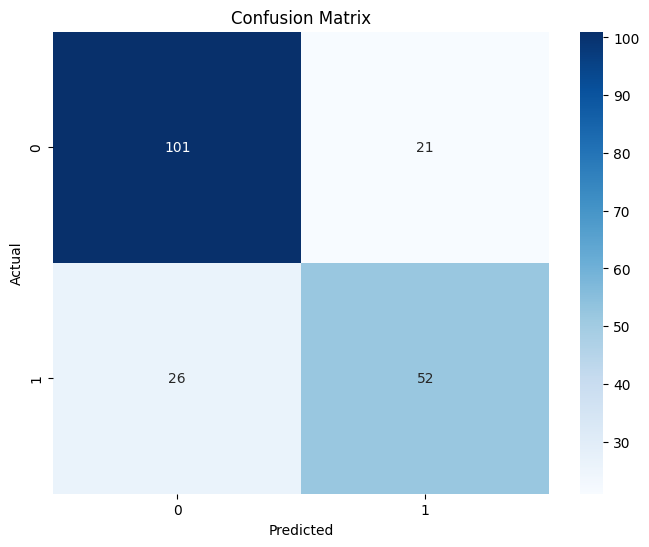

In [33]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
import matplotlib.pyplot as plt

plt.title('Confusion Matrix')
plt.show()

# **Checking Accuracy of the model By Comparing Predicted value and Actual value**

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.765

In [36]:
model.score(X_test,y_test)

0.765

In [37]:
#Evaluating Model's Performace
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       122
           1       0.71      0.67      0.69        78

    accuracy                           0.77       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.76      0.77      0.76       200



# **Saving the Model and Scaler**

In [38]:
import pickle

In [39]:
#specifying file to store model, where wb means "write binary"
with open("RF_Model.pickle", "wb") as f:
  pickle.dump(model,f)

In [40]:
#specifying file to store scaler, where wb means "write binary"
with open("scaler.pickle", "wb") as f:
  pickle.dump(scaler,f)

# **Feature Importance**

In [41]:
features = pd.DataFrame(model.feature_importances_, index = x.columns)

In [42]:
features

,0
Gender,0.026450
Age,0.218516
Salary,0.461536
Price,0.293498


From the result of the features score we can see that the salary, price of product, and Age are the key features influencing purchasing decisions of customers.